<a href="https://colab.research.google.com/github/meghamkpatel/INFO6105/blob/main/Assignment1/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sci Eng Methods 
## Assignment 1 – Zomato_EDA

*ML Data Cleaning and Feature Selection*


# Abstract

Zomato is an Indian multinational restaurant aggregator and food delivery company. 

Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. 
This dataset is comprised of information of food restraunts in Banglaore working with Zomato.

Reference: https://www.kaggle.com/datasets/pranavuikey/zomato-eda

The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset:
<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?

<br>The dataset contains inconsistant values and missing data so it will require cleaning up. The significance of the predictors is investigated and it appears that of the 16 independent variables,  9 are significant, these results can be used to further optimize the model for predicting the best restaurants depending on a customer's need.
   


_________________________________________________________
###Getting our data

This dataset contains 51717 data values which is above GitHub's threshold of .csv files. Accordingly, we pull in the kaggle dataset directly using the kaggle library and my kaggle credentials.

In [ ]:
#installing dependencies
!pip install eli5
! pip install -q kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 25.2 MB/s 
     |████████████████████████████████| 133 kB 62.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=033cf9bb75f25600b2faff30963d6b2efe1eeb3c45c2d8f7fc3b8f82938315ea
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
#making a directory for kaggle api
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

Saving kaggle.json to kaggle.json


In [ ]:
#downloading and reading the zomato dataset
! kaggle datasets list -s zomato # searching through kaggle with keyword 'zomato'
! kaggle datasets download -d pranavuikey/zomato-eda
!unzip zomato-eda.zip

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          45325       1152  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          43785        612  0.7941176        
batjoker/zomato-restaurants-hyderabad                        Zomato Restaurants Hyderabad                         1MB  2020-06-08 15:11:39           3076         62  1.0              
phiitm/chennai-zomato-restaurants-data                       Chennai Zomato Rest

In [ ]:
#Viewing data in the file 
data = pd.read_csv("zomato.csv")
data.shape
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

#Cleaning Up Data


###Dropping columns 

The columns phone, dish_liked, url, menu_item, and reviews_list help identify the restaurant but do not add characteristics to the dataset so we can drop them. 

In [ ]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data.head(3)

name online_order book_table   rate  votes      location  \
0            Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1   Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2  San Churro Cafe          Yes         No  3.8/5    918  Banashankari   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   

  approx_cost(for two people) listed_in(type)  
0                         800          Buffet  
1                         800          Buffet  
2                         800          Buffet

#### Renaming Column Headers
To better understand the data, let's first rename our column headers with appropriate units and descripter language. 

In [ ]:
data.rename(columns={'name':'Restaurant','online_order': 'Online Ordering?', 'book_table':'Reservation Needed?','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost(Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

Restaurant Online Ordering? Reservation Needed? Rating  \
0            Jalsa              Yes                 Yes  4.1/5   
1   Spice Elephant              Yes                  No  4.1/5   
2  San Churro Cafe              Yes                  No  3.8/5   

   Number of Votes          City      Restaurant Type  \
0              775  Banashankari        Casual Dining   
1              787  Banashankari        Casual Dining   
2              918  Banashankari  Cafe, Casual Dining   

                         Cuisines Cost(Rupees) Meal Type  
0  North Indian, Mughlai, Chinese          800    Buffet  
1     Chinese, North Indian, Thai          800    Buffet  
2          Cafe, Mexican, Italian          800    Buffet

###Missing Data

Imputing Missing Data:
We have three methods for imputing missing data. Using the median, dropping, and using machine learning. 

In [ ]:
missing_list = data.columns[data.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / data.shape[0]) * 100
Missing_DF

Missing_Column  Missing_Values  %_Missing
0           Rating            7775  15.033741
1             City              21   0.040606
2  Restaurant Type             227   0.438927
3         Cuisines              45   0.087012
4     Cost(Rupees)             346   0.669026

We see that most of our missing data is Rating. The median method in this case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not get the chance pass the inspection exam with rating "NEW" should not be replaced by a 3 star rating when there is an equal chance the restaurant could be of lower or higher quality. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method for columns that are missing 5% or less of data since it is a very small percentage of missing data.
Note: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.

In [ ]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [ ]:
data.isnull().sum()

Restaurant             0
Online Ordering?       0
Reservation Needed?    0
Rating                 0
Number of Votes        0
City                   0
Restaurant Type        0
Cuisines               0
Cost(Rupees)           0
Meal Type              0
dtype: int64

#### Remove Duplicates
In case we have any duplicated rows, we remove duplicates. This is ensure there is no bias with repeating restaurants.

In [ ]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


### Clean up individual columns
Finally, we should check each variable and clean out data that does not make sense. This can either mean standardizing what "null" means in that context or removing random characters from changing data formats from object to integer



##### *Rating*

In [ ]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

By displaying all unique values from the Rating column, we see that some entries contain "NEW", "nan", and "-" representing no ratings. We can standardize empty values to be nan. We also see that the Rating field contains strings of a floating number out of 5. To prepare for analyzing our data, we will extract the rating, setting the variable to be of type float. 

In [ ]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           30958 non-null  object 
 1   Online Ordering?     30958 non-null  object 
 2   Reservation Needed?  30958 non-null  object 
 3   Rating               29638 non-null  float64
 4   Number of Votes      30958 non-null  int64  
 5   City                 30958 non-null  object 
 6   Restaurant Type      30958 non-null  object 
 7   Cuisines             30958 non-null  object 
 8   Cost(Rupees)         30958 non-null  object 
 9   Meal Type            30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [ ]:
data['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

##### *Location*


In [ ]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [ ]:
data['City'].value_counts(ascending=False)

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: City, Length: 92, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

##### *Cost*


In [ ]:
data['Cost(Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.





In [ ]:
data = data.dropna()

In [ ]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost(Rupees)']=data['Cost(Rupees)'].apply(money)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           29638 non-null  object 
 1   Online Ordering?     29638 non-null  object 
 2   Reservation Needed?  29638 non-null  object 
 3   Rating               29638 non-null  float64
 4   Number of Votes      29638 non-null  int64  
 5   City                 29638 non-null  object 
 6   Restaurant Type      29638 non-null  object 
 7   Cuisines             29638 non-null  object 
 8   Cost(Rupees)         29638 non-null  int64  
 9   Meal Type            29638 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


##### *Booking*


In [ ]:
data['Reservation Needed?'].unique()

array(['Yes', 'No'], dtype=object)

Booking has no typos so we can proceed.

##### *Online Order*


In [ ]:
data['Online Ordering?'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Online Ordering has no typos so we can proceed.

##### *Restaurant Type*


In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [ ]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   9492
Casual Dining                 7151
Cafe                          2420
Dessert Parlor                1309
Delivery                      1054
                              ... 
Bakery, Food Court               2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: Restaurant Type, Length: 87, dtype: int64

The Restaurant type has lots of values with multiple values for one restaurant. We can simplify the types to general group for better analysis.

In [ ]:
def typeSimplify(value):
    value = str(value)
    if 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value:
        return 'Dessert'
    elif 'Quick Bites' in value:
      return 'Quick Bites'
    elif 'Bar' in value or 'Microbrewery' in value:
      return 'Bar'
    elif 'Bakery' in value:
      return 'Bakery'
    elif 'Casual Dining' in value:
      return 'Casual Dining'
    elif 'Fine Dining' in value:
      return 'Fine Dining'
    elif 'Food Court' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value:
      return 'North Indian'
    elif 'South Indian' in value:
      return 'South Indian'
    else:
        return value
    
data['Restaurant Type']=data['Restaurant Type'].apply(typeSimplify)
data['Restaurant Type'].head(10)

0    Casual Dining
1    Casual Dining
2    Casual Dining
3      Quick Bites
4    Casual Dining
5    Casual Dining
6    Casual Dining
7    Casual Dining
8             Cafe
9             Cafe
Name: Restaurant Type, dtype: object

In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Mess',
       'Dessert', 'Pub', 'Bakery', 'Takeaway, Delivery', 'Fine Dining',
       'Beverage Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway',
       'Lounge', 'Street Food', 'Dhaba', 'Club', 'Bhojanalya'],
      dtype=object)

In [ ]:
data['Restaurant Type'].isnull().sum()

0

##### *Meal Type*


In [ ]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data['Meal Type'].value_counts()

Delivery              13504
Dine-out              10867
Desserts               2031
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: Meal Type, dtype: int64

Meal Type has no typos so we can proceed.

##### *Cuisines*


In [ ]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
data['Cuisines'].value_counts()

North Indian                                1518
North Indian, Chinese                       1339
South Indian                                 851
Bakery, Desserts                             455
Biryani                                      410
                                            ... 
South Indian, Mangalorean, Chinese             1
Fast Food, Andhra                              1
Kerala, Biryani, North Indian, Chettinad       1
North Indian, Street Food, Fast Food           1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

Cuisines have multiple values for one restaurant with repeating keywords but they show has different categories. We can simplify this to general groups for better analysis. 

In [ ]:
data['Cuisines'].isnull().sum()

0

In [ ]:
def cuisineSimplify(value):
    value = str(value)
    if 'Italian' in value or 'Pizza' in value:
        return 'Italian'
    elif 'African' in value:
      return 'African'
    elif 'Continental' in value:
      return 'Continental'
    elif "Mughlai" in value or 'Middle Eastern' in value or 'Biryani' in value or 'Arabian' in value or 'Turkish' in value:
      return 'Middle Eastern'
    elif 'Burger' in value or 'American' in value or 'Salad' in value or 'Sandwich' in value:
      return 'American'
    elif 'Indian' in value and 'Chinese' in value:
      return 'Asian Fusion'
    elif 'Thai' in value or 'Japanese' in value or 'Asian' in value or 'Chinese' in value or 'Tibetan' in value or 'Momo' in value:
      return 'Asian'
    elif 'Mexican' in value:
      return 'Mexican'
    elif 'Street Food' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value or 'Rajasthani' in value or "Gujarati" in value or 'Bengali' in value:
      return 'North Indian'
    elif 'South Indian' in value or 'Kerala' in value or 'Bengali' in value or 'Andhra' in value or 'Maharashtrian':
      return 'South Indian'
    elif 'Mediterranean' in value:
      return 'Mediterranean'
    elif 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value or 'Mithai' in value:
      return 'Dessert'
    elif 'Cafe' in value:
      return 'Cafe'
    else:
        return value
    
data['Cuisines']=data['Cuisines'].apply(cuisineSimplify)
data['Cuisines'].head(10)


0    Middle Eastern
1      Asian Fusion
2           Italian
3      North Indian
4      North Indian
5      North Indian
6      Asian Fusion
7           Italian
8           Italian
9           Italian
Name: Cuisines, dtype: object

In [ ]:
data['Cuisines'].unique()

array(['Middle Eastern', 'Asian Fusion', 'Italian', 'North Indian',
       'Cafe', 'Continental', 'Fast Food', 'American', 'South Indian',
       'Asian', 'Street Food', 'African', 'Mexican'], dtype=object)

##### *Restaurant*

In [ ]:
data['Restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [ ]:
data.groupby('Restaurant').count().head()

Online Ordering?  Reservation Needed?  \
Restaurant                                                                    
#FeelTheROLL                                         2                    2   
#L-81 Cafe                                           4                    4   
#refuel                                              3                    3   
1000 B.C                                             2                    2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C                 2                    2   

                                      Rating  Number of Votes  City  \
Restaurant                                                            
#FeelTheROLL                               2                2     2   
#L-81 Cafe                                 4                4     4   
#refuel                                    3                3     3   
1000 B.C                                   2                2     2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C       2                2     2   

                                      Restaurant Type  Cuisines  Cost(Rupees)  \
Restaurant                                                                      
#FeelTheROLL                                        2         2             2   
#L-81 Cafe                                          4         4             4   
#refuel                                             3         3             3   
1000 B.C                                            2         2             2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C                2         2             2   

                                      Meal Type  
Restaurant                                       
#FeelTheROLL                                  2  
#L-81 Cafe                                    4  
#refuel                                       3  
1000 B.C                                      2  
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C          2

Restaurant names have some funky character so we must clear that out for better reads. 

In [ ]:
#Remove random characters

data['Restaurant']=data['Restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [ ]:
data.groupby('Restaurant').count().head()

Online Ordering?  Reservation Needed?  Rating  Number of Votes  \
Restaurant                                                                     
#FeelTheROLL                 2                    2       2                2   
#L-81 Cafe                   4                    4       4                4   
#refuel                      3                    3       3                3   
1000 B.C                     2                    2       2                2   
100C                         2                    2       2                2   

              City  Restaurant Type  Cuisines  Cost(Rupees)  Meal Type  
Restaurant                                                              
#FeelTheROLL     2                2         2             2          2  
#L-81 Cafe       4                4         4             4          4  
#refuel          3                3         3             3          3  
1000 B.C         2                2         2             2          2  
100C             2                2         2             2          2

# Data transforming, Feature creation and Analysis

In [ ]:
data_clean = data #making a copy so we don't lose all that progress!

###Analyzing Rating

First, let's us analyze the value that we are trying to predict! We must first check if the data is normalized or has some sort of relationship. If not, we would be able to build a meaningful model that would predict the rating of Zomato restaurants. 

In [ ]:
data_clean['Rating'].describe()

count    29638.000000
mean         3.732850
std          0.452188
min          1.800000
25%          3.400000
50%          3.800000
75%          4.100000
max          4.900000
Name: Rating, dtype: float64

With the minimum, maxium, and mean values being evenly spread out, we can safely guess that the column is normally distributed. But let's see this graphically.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


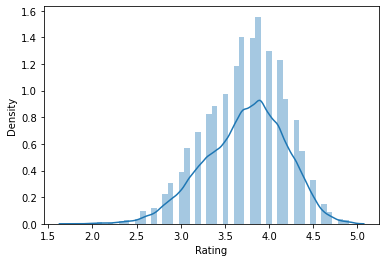

In [ ]:
sns.distplot(data_clean['Rating']);

In [ ]:
print("Skewness: %f" % data_clean['Rating'].skew())
print("Kurtosis: %f" % data_clean['Rating'].kurt())

Skewness: -0.360923
Kurtosis: -0.058365


<Figure size 576x360 with 0 Axes>

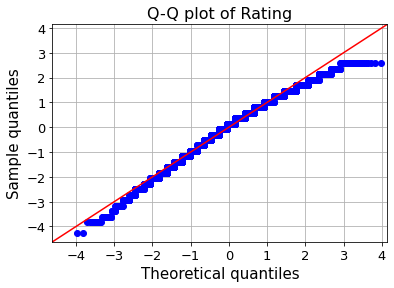

In [ ]:
from statsmodels.graphics.gofplots import qqplot
  
plt.figure(figsize=(8,5))
fig=qqplot(data_clean['Rating'],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of {}".format('Rating'),fontsize=16)
plt.grid(True)
plt.show()

By analyzing the QQPlot and distribution plot, we see that Rating follows a general normal distribution with a very slight left skew. Thus, we can use a linear model to predict the rating of a restaurant. 

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

###Analyzing Numerical Variables

<Figure size 576x360 with 0 Axes>

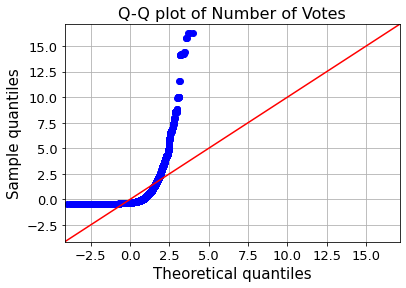

<Figure size 576x360 with 0 Axes>

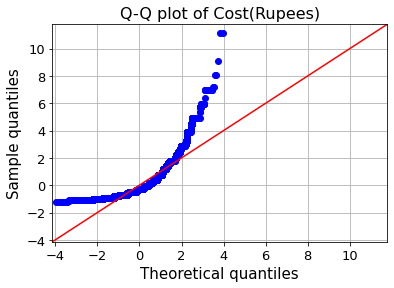

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_temp=data_clean[['Number of Votes', 'Cost(Rupees)']]
for c in data_temp.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_temp[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


1.	Looking at the Q-Q plot above, it appears that both numeric independent variables are not normally distributed but instead follow a exponential distribution
2.	The predictors looks right skewed with a few outliers for entries for the higher values


In [ ]:
print("Skewness of Votes: %f" % data_clean['Number of Votes'].skew())
print("Kurtosis of Votes: %f" % data_clean['Number of Votes'].kurt())
print("Skewness of Cost: %f" % data_clean['Cost(Rupees)'].skew())
print("Kurtosis of Cost: %f" % data_clean['Cost(Rupees)'].kurt())

Skewness of Votes: 6.156129
Kurtosis of Votes: 57.959362
Skewness of Cost: 2.259205
Kurtosis of Cost: 7.984325


Double checking we see an indeed right skewness of both variables. The high kurtosis tells us that the data has heavier tails (or outliers). We can fix this with a log transformation.

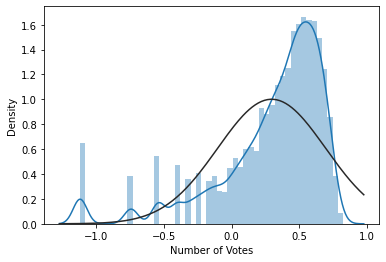

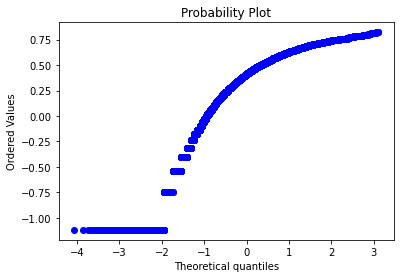

In [ ]:
from scipy.stats import norm
from scipy import stats
#log transformation
data_clean['Number of Votes'] = np.log(data_clean['Number of Votes'])

#transformed histogram and normal probability plot
sns.distplot(data_clean['Number of Votes'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_clean['Number of Votes'], plot=plt)

By applying a log transformation, we can see the mean (center) of the dataset shift to the left with a thicker distribution. Followed by the probability plot which shows us a better linear line. *Phew*

We can do the same thing with the Cost variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


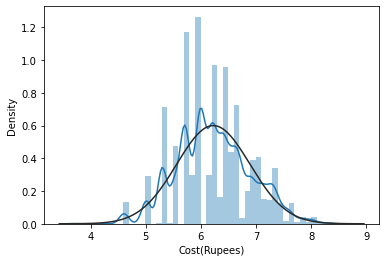

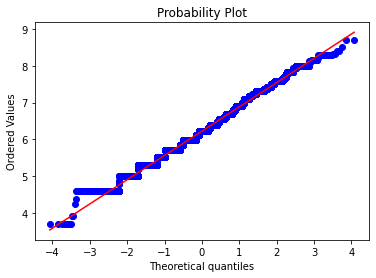

In [ ]:
#data transformation
data_clean['Cost(Rupees)'] = np.log(data_clean['Cost(Rupees)'])

#transformed histogram and normal probability plot
sns.distplot(data_clean['Cost(Rupees)'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_clean['Cost(Rupees)'], plot=plt)

The distribution plot produced a normal distribution and the probability plot follows a diagonal line. We can now proceed to analyze our numerical data. 

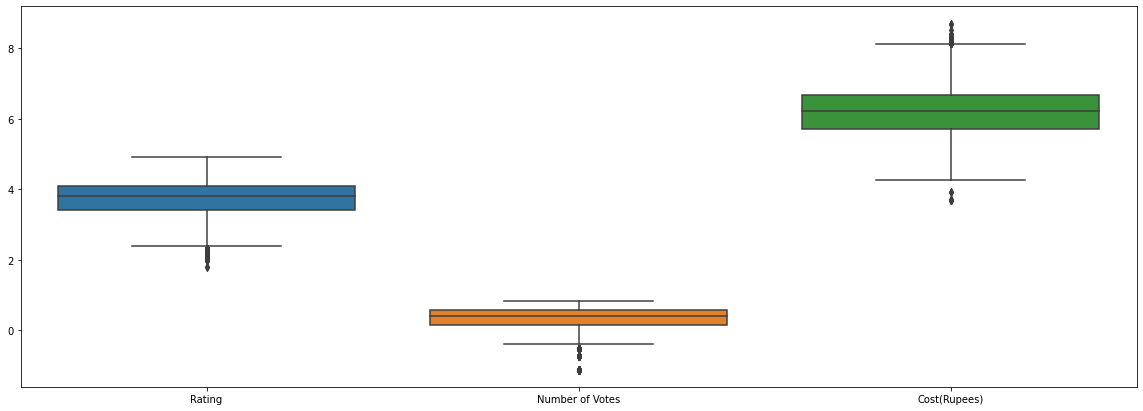

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data_clean)

The boxplot shows the distributions of the the numerical variables in one view. We can see that Rating and Cost have an even distribution with very few outliers. On the other hand, we still see Votes having more data associated with higher votes and a larger trail of outliers as its tail. This can be telling that the Votes might be an influential predictor on the rating values. The distribution of Votes makes sense however as there are more likely to be votes on a restaurant than few. 

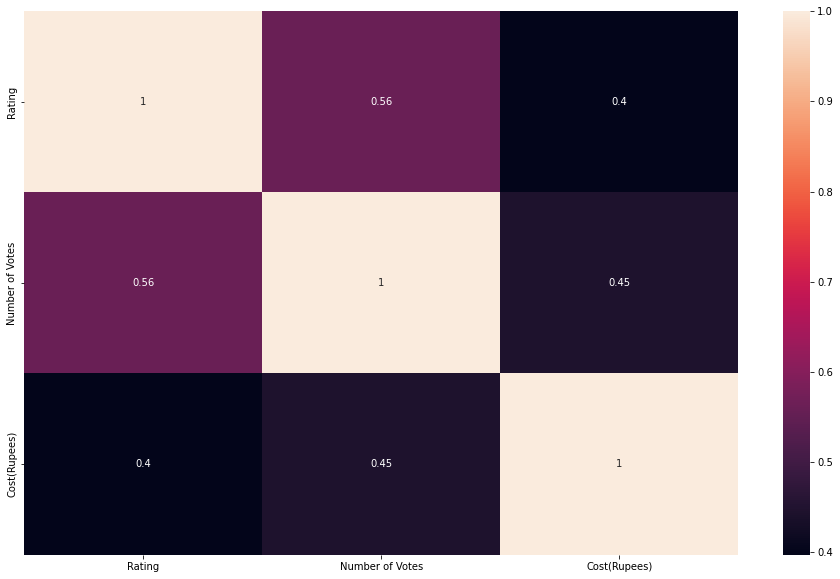

In [ ]:
plt.figure(figsize = (16, 10))
corr=data_clean.corr()
sns.heatmap(corr, annot = True)
plt.show()

As alluded to previously, we can see in the heatmap that the Number of Votes has a higher correlation to Rating than Cost(Rupees). There might be some multicollinearity between Cost and Votes but we will investigate that soon. 

###Analyzing Catagorical Values

In addition to checking if our numerical variables' influence on the data, we must also check the catagorical variables' influence as well. 

Before we analyze the correlations, we must drop the Restaurant column as it contains unique values that would make our views messy.

In [ ]:
data_clean.drop(['Restaurant'],axis = 1,inplace=True)
categorical = data_clean.select_dtypes(include= [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


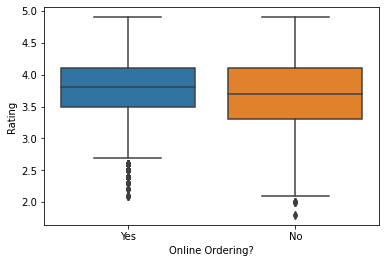

In [ ]:
sns.boxplot(x='Online Ordering?',y='Rating' , data = data_clean)

Online Ordering has two options: Yes or No. By plotting a box plot against Rating we see that the mean values of both yeses and nos are very similar despite there being more nos. We can predict that Online Ordering does not impact the rating of restaurants. 

<Figure size 1152x720 with 0 Axes>

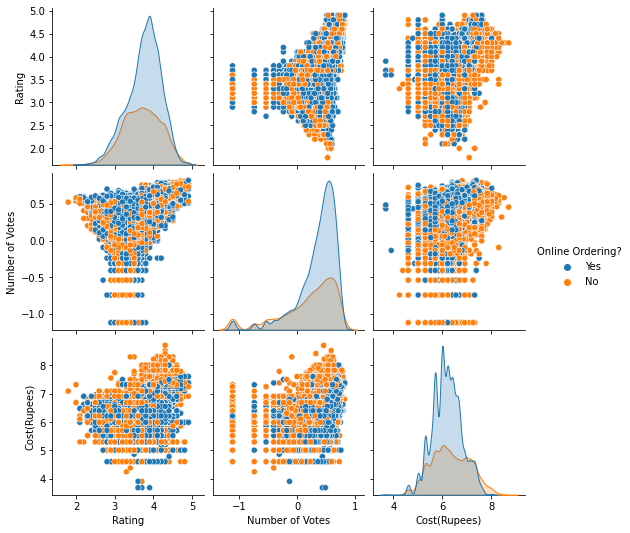

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data_clean, hue='Online Ordering?')
plt.show()

And much to our prediction, we can see that Online Ordering is evenly spread out across each plot with no clear separations.

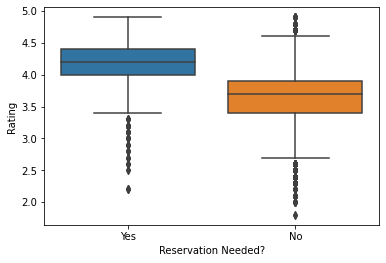

In [ ]:
sns.boxplot(x='Reservation Needed?',y='Rating' , data = data_clean) 

Similarly, Reservation Needed consists of only yeses and nos. Plotting the box plot we see that the restaurants that require a reservation have a higher average rating than restaurants that don't. We can predict that booking a restaurant will have significance on rating. 

<Figure size 1152x720 with 0 Axes>

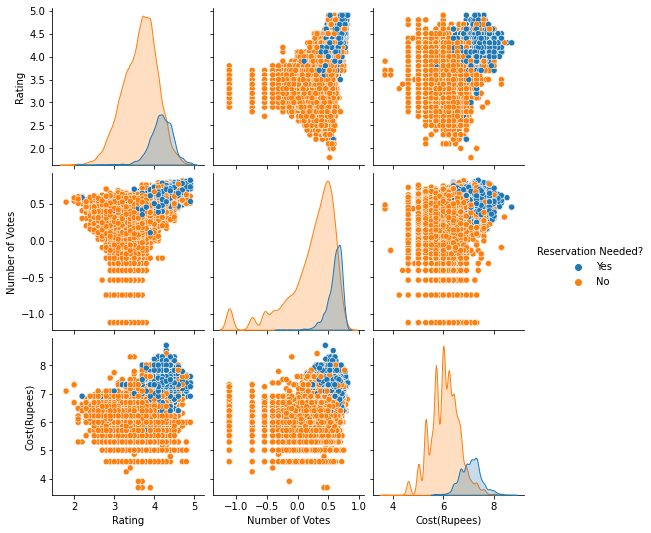

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data_clean, hue='Reservation Needed?')
plt.show()

Highlighting our pairplots with the Reservation Needed column, we can see that reservations tend to gravitate towards higher ratings, higher votes, and higher costs. 

This makes sense! When going to a 5 star Michelin restaurant, you would expect the food to be expensive and lots of reviews raving about the food. 

We can similarly, check the distributions of the other catagorical variables by plotting them on our pairplots. 

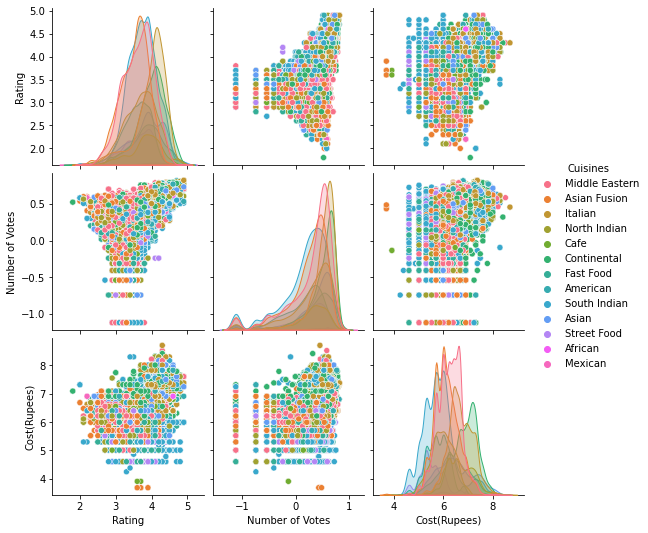

In [ ]:
sns.pairplot(data_clean, hue='Cuisines')

Cuisines look evenly spread out across each plot. We can assume there is no influence on the cuisine over the rating.

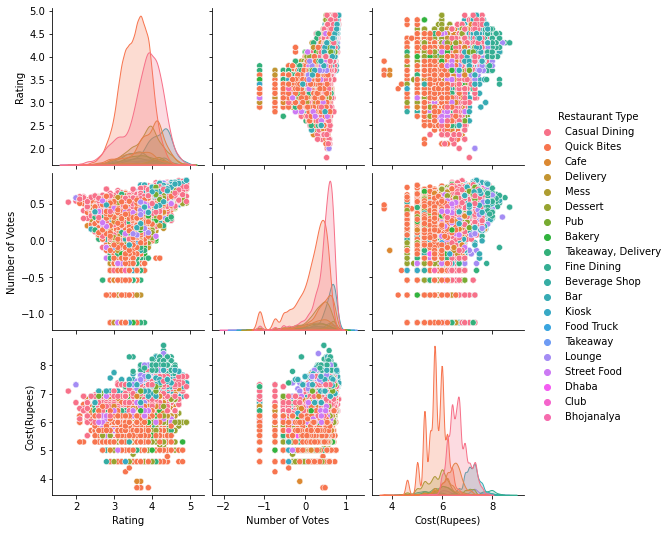

In [ ]:
sns.pairplot(data_clean, hue='Restaurant Type')

Right of the bat I see a lot of pinks and reds but there is no clear groups of restaurant types rated higher than another. 

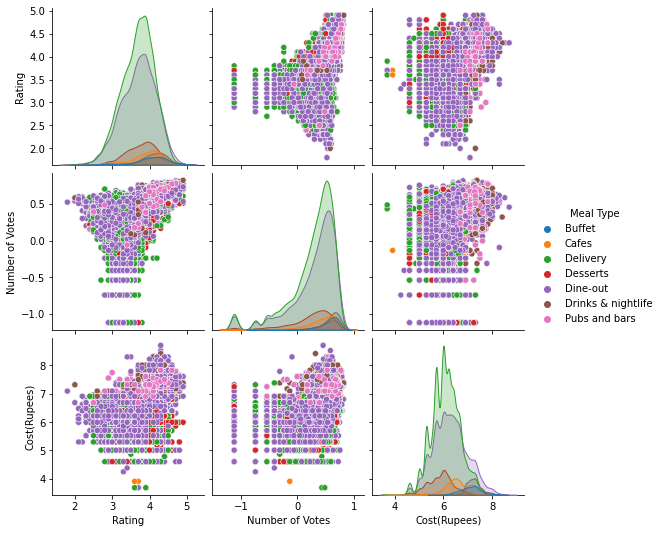

In [ ]:
sns.pairplot(data_clean, hue='Meal Type')

Again, we see a lot of purples and pinks but there is no clear distinguished groups showing one meal type is rated higher than the other. 

###Standardizing our data

Now that we see each variable individually, let us see the bigger picture on how these variable interact with each other. This is important since in the real world many factors influence an outcome. 

First, let's convert the binary catagorical columns to binary numerical columns so that our tools can understand the data better. 

In [ ]:
data_clean['Reservation Needed?'] = data_clean['Reservation Needed?'].map({'Yes': 1, 'No': 0})

In [ ]:
data_clean['Online Ordering?'] = data_clean['Online Ordering?'].map({'Yes': 1, 'No': 0})

Similarly, we can convert our catagorical variables to numerical ones by creating a new column for each group with a binary value of 1 if that value belongs to that entry (0 if not).

In [ ]:
#Creating binary vaiables for Categorical Cols
data_norm = pd.get_dummies(data_clean)

Now we can check for the correlations of all variables in one view.

In [ ]:
data_norm.corr()

Online Ordering?  Reservation Needed?    Rating  \
Online Ordering?                      1.000000            -0.067144  0.056666   
Reservation Needed?                  -0.067144             1.000000  0.446543   
Rating                                0.056666             0.446543  1.000000   
Number of Votes                       0.185100             0.368308  0.560355   
Cost(Rupees)                         -0.107635             0.593552  0.397029   
...                                        ...                  ...       ...   
Meal Type_Delivery                    0.284723            -0.162875 -0.103410   
Meal Type_Desserts                   -0.045895            -0.086740  0.035879   
Meal Type_Dine-out                   -0.156285             0.022922 -0.047146   
Meal Type_Drinks & nightlife         -0.146884             0.224108  0.131085   
Meal Type_Pubs and bars              -0.101035             0.166261  0.097932   

                              Number of Votes  Cost(Rupees)  City_BTM  \
Online Ordering?                     0.185100     -0.107635  0.052359   
Reservation Needed?                  0.368308      0.593552 -0.087937   
Rating                               0.560355      0.397029 -0.066417   
Number of Votes                      1.000000      0.445867 -0.053273   
Cost(Rupees)                         0.445867      1.000000 -0.119584   
...                                       ...           ...       ...   
Meal Type_Delivery                  -0.057365     -0.195057  0.071865   
Meal Type_Desserts                  -0.054866     -0.140059 -0.028058   
Meal Type_Dine-out                  -0.021931      0.044938 -0.018278   
Meal Type_Drinks & nightlife         0.111109      0.266037 -0.037357   
Meal Type_Pubs and bars              0.075302      0.190302 -0.027091   

                              City_Banashankari  City_Banaswadi  \
Online Ordering?                      -0.005411       -0.011342   
Reservation Needed?                   -0.033281       -0.044568   
Rating                                -0.018898       -0.053931   
Number of Votes                       -0.000683       -0.048371   
Cost(Rupees)                          -0.049897       -0.040156   
...                                         ...             ...   
Meal Type_Delivery                    -0.006587       -0.022829   
Meal Type_Desserts                     0.006192       -0.012236   
Meal Type_Dine-out                     0.012706        0.043374   
Meal Type_Drinks & nightlife          -0.012603       -0.010939   
Meal Type_Pubs and bars               -0.017744       -0.012487   

                              City_Bannerghatta Road  City_Basavanagudi  ...  \
Online Ordering?                            0.019099           0.002347  ...   
Reservation Needed?                        -0.039856          -0.045764  ...   
Rating                                     -0.072464          -0.016003  ...   
Number of Votes                            -0.045668          -0.033798  ...   
Cost(Rupees)                               -0.038203          -0.097653  ...   
...                                              ...                ...  ...   
Meal Type_Delivery                          0.010344          -0.006212  ...   
Meal Type_Desserts                          0.005680           0.009667  ...   
Meal Type_Dine-out                          0.007947           0.018885  ...   
Meal Type_Drinks & nightlife               -0.019487          -0.015344  ...   
Meal Type_Pubs and bars                    -0.021216          -0.016412  ...   

                              Cuisines_North Indian  Cuisines_South Indian  \
Online Ordering?                          -0.007754              -0.027277   
Reservation Needed?                        0.023139              -0.132045   
Rating                                    -0.033194               0.012373   
Number of Votes                           -0.013811              -0.139473   
Cost(Rupees)            

That view was indeed detailed and could be useful but let's make this a bit more visually appealing with a heatmap!

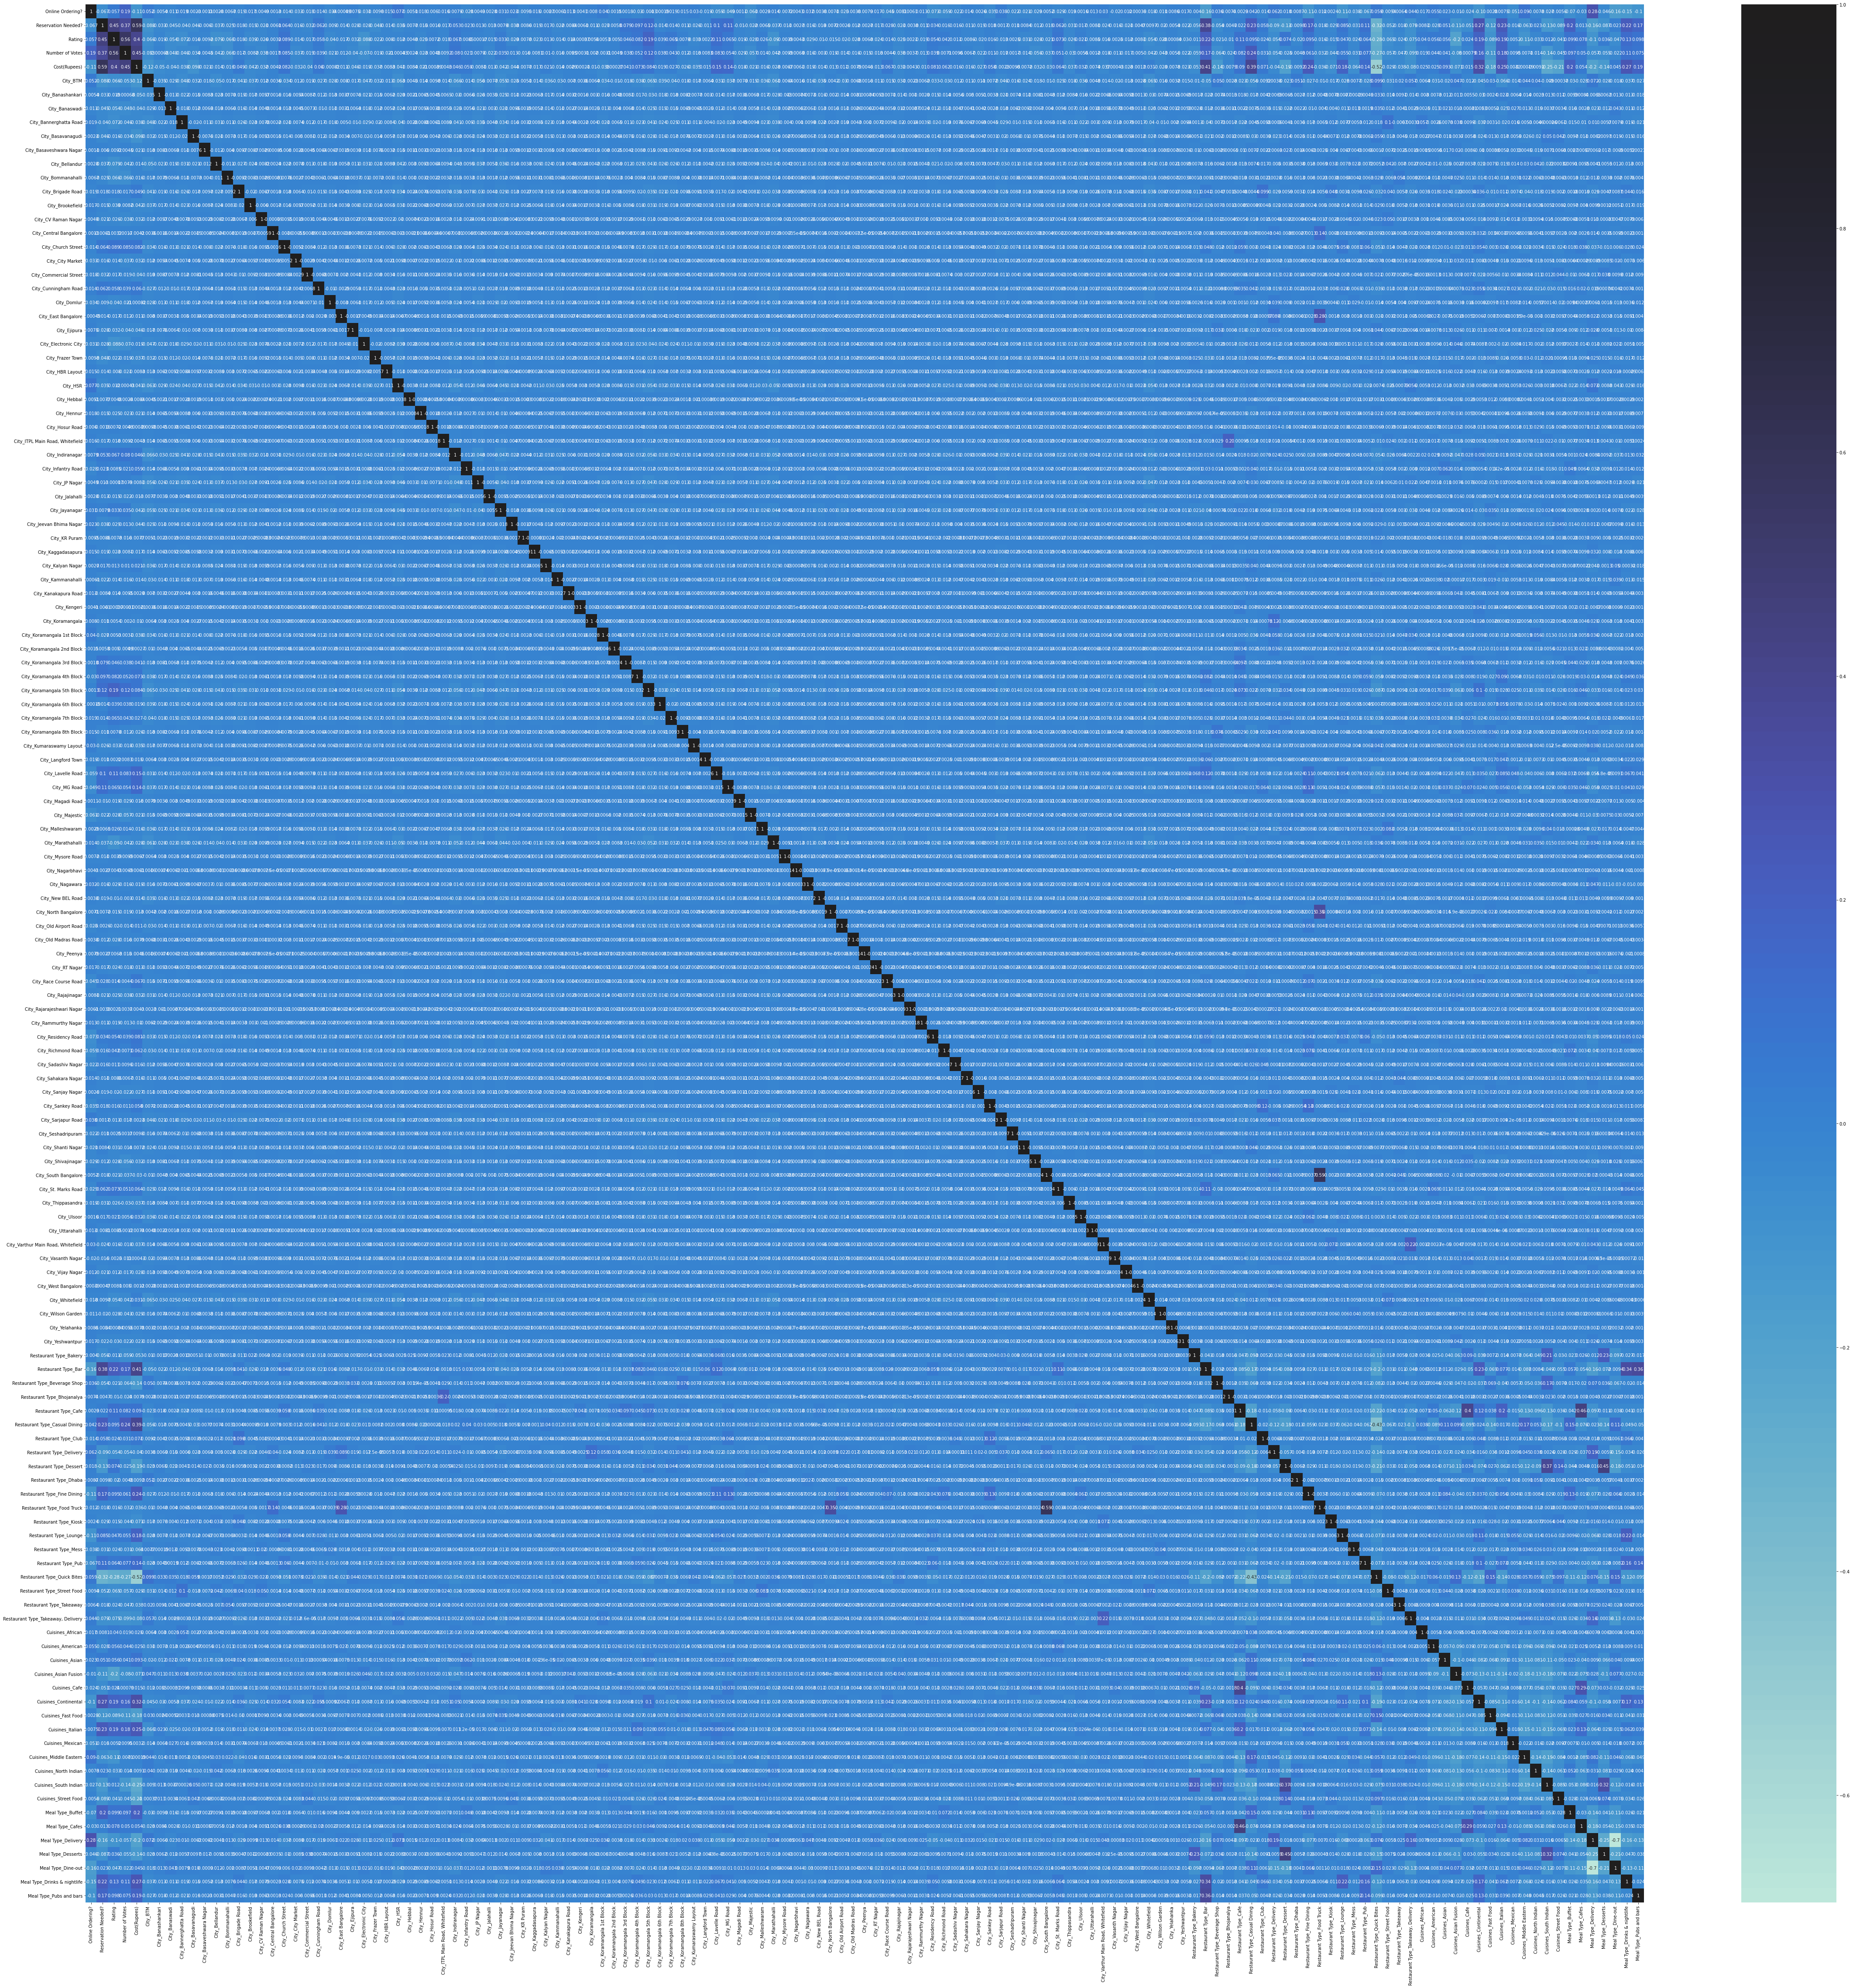

In [ ]:
plt.figure(figsize = (80, 80))
corr=data_norm.corr()
sns.heatmap(corr, annot = True, center=1)
plt.show()

That a huge heatmap but once we zoom in a bit, we can see points where the correlation is closer to 1 or -1. Just viewing the Rating column, we can quickly identify that Number of Votes, Reservation Needed?, and Cost(Rupees) have a higher correlation on Rating. We can also check for multicollinearity. For each of those significant variables, we can see if they have an impact on each other. Looking at the heat map can be hard to see so we can check for the Variance Inflation Factor for each variable. VIF is a measure of multicollinearity in the set of multiple regression variables. The higher the value of VIF, the higher the correlation between this variable and the rest.

In [ ]:
data_norm = data_norm.dropna()

In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data_norm.columns
vif["vif_Factor"] = [variance_inflation_factor(data_norm.values, i) for i in range(data_norm.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features  vif_Factor
0                Online Ordering?    1.280001
1             Reservation Needed?    1.930346
2                          Rating    1.867087
3                 Number of Votes    1.798670
4                    Cost(Rupees)    3.836553
..                            ...         ...
132            Meal Type_Delivery         inf
133            Meal Type_Desserts         inf
134            Meal Type_Dine-out         inf
135  Meal Type_Drinks & nightlife         inf
136       Meal Type_Pubs and bars         inf

[137 rows x 2 columns]

It is usually considered to be highly correlated if the VIF value is higher than 10. None of the values we were looking at show a VIF value of 10 so we can assume there is no multicollinearly. 

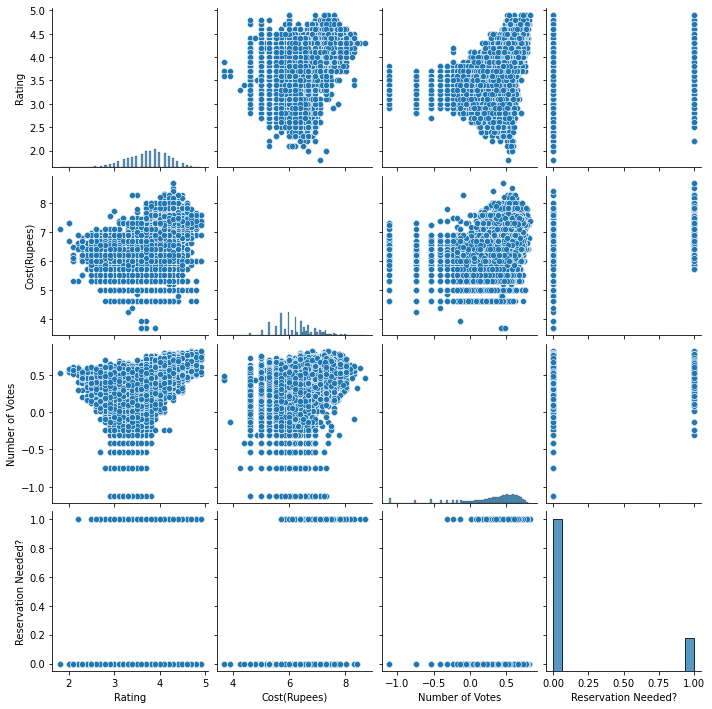

In [ ]:
sns.pairplot(data_norm, vars=['Rating','Cost(Rupees)', 'Number of Votes', 'Reservation Needed?'])

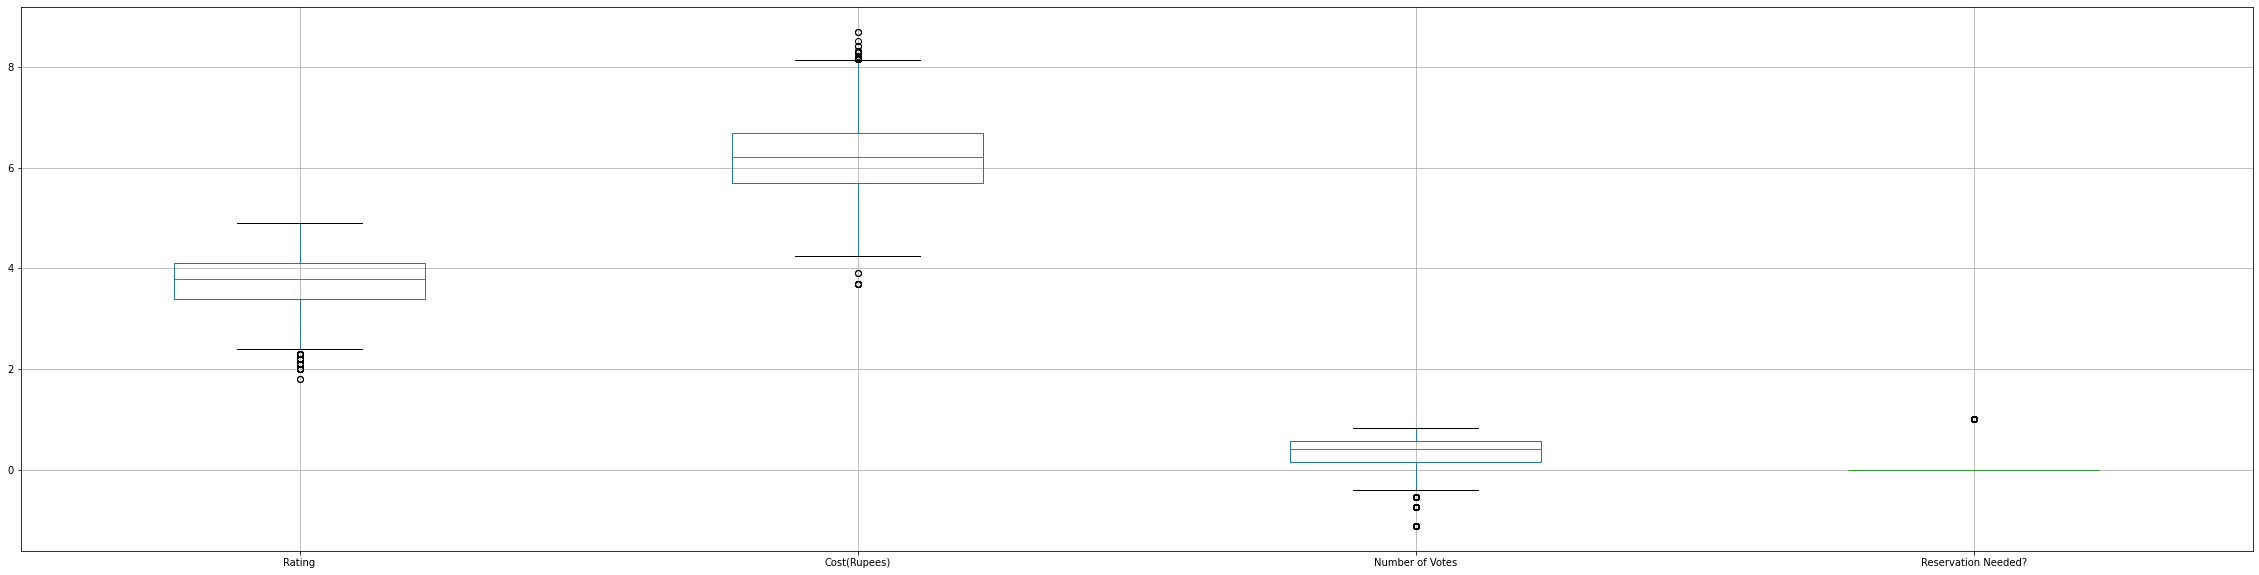

In [ ]:
plt.figure(figsize=(40,10))
data_norm.boxplot(column=['Rating','Cost(Rupees)', 'Number of Votes', 'Reservation Needed?'])

Comparing the heatmap, correlation matrix, and pairplots we see that Rating is correlated by Cost(Rupees), Number of Votes, and if Reservation is needed.

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data_norm['Rating'], data_norm[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']], axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          6.646e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        03:16:51   Log-Likelihood:                         -18690.
No. Observations:               29611   AIC:                                  3.739e+04
Df Residuals:                   29608   BIC:                                  3.741e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Number of Votes         0.3026      0.007     41.764      0.000       0.288       0.317
Cost(Rupees)            0.5862      0.001   1050.737      0.000       0.585       0.587
Reservation Needed?    -0.1631      0.008    -21.736      0.000      -0.178      -0.148
==============================================================================
Omnibus:                     2184.334   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3598.547
Skew:                          -0.569   Prob(JB):                         0.00
Kurtosis:                       4.274   Cond. No.                         20.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could not test each variable in data_norm because there are a lot of columns and there was evidence that there was correlation with only a few columns. All other predictors can be assumed to be not significant.
1. Number of votes has a p-value of 0, hence it is a significant feature
2. Cost(Rupees) has a p-value of 0 hence it is a significant feature
3. Reservation Needed? has a p-value of 0 hence it is a significant feature

Hence, as number of votes increase, cost increases, and reservations are not required, we would see a higher rating. 


For fun, let us check the regression model with Online Ordering.



In [ ]:
model = sm.OLS(data_norm['Rating'], data_norm[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?', 'Online Ordering?']], axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          5.123e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        03:16:55   Log-Likelihood:                         -18291.
No. Observations:               29611   AIC:                                  3.659e+04
Df Residuals:                   29607   BIC:                                  3.662e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Number of Votes         0.2610      0.007     35.781      0.000       0.247       0.275
Cost(Rupees)            0.5709      0.001    743.186      0.000       0.569       0.572
Reservation Needed?    -0.1205      0.008    -15.954      0.000      -0.135      -0.106
Online Ordering?        0.1561      0.005     28.437      0.000       0.145       0.167
==============================================================================
Omnibus:                     1938.454   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3195.535
Skew:                          -0.518   Prob(JB):                         0.00
Kurtosis:                       4.231   Cond. No.                         21.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that Online Ordering is also significant but it increased the t-score and slope. 

Hence, as the number of votes increases, cost increases, reservation is not required and the restaurant offers online ordering, the higher we can predict the rating. 

In [ ]:
model = sm.OLS(data_norm['Rating'], data_norm[['Number of Votes', 'Cost(Rupees)', 'Online Ordering?']], axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          6.771e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        03:19:09   Log-Likelihood:                         -18418.
No. Observations:               29611   AIC:                                  3.684e+04
Df Residuals:                   29608   BIC:                                  3.687e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Number of Votes      0.2205      0.007     32.107      0.000       0.207       0.234
Cost(Rupees)         0.5673      0.001    770.316      0.000       0.566       0.569
Online Ordering?     0.1735      0.005     32.104      0.000       0.163       0.184
==============================================================================
Omnibus:                     1471.814   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2360.843
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       4.089   Cond. No.                         16.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similarly, by removing Reservation Needed and adding Ordering Online, we only have postive slopes so the model would increase as the Number of Votes increases, Cost increases, and has Online Ordering. 

For now, let us choose the semi-flexible model with Reservations, Cost, and Votes.

# Building the Model

##Linear Regression Modelling

In [ ]:
from sklearn.model_selection import  train_test_split

trainingData = data_norm[['Rating', 'Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']]
#Splitting the columns into Target and Predictor variables
X = trainingData.drop(['Rating'],axis=1)
Y = trainingData['Rating']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

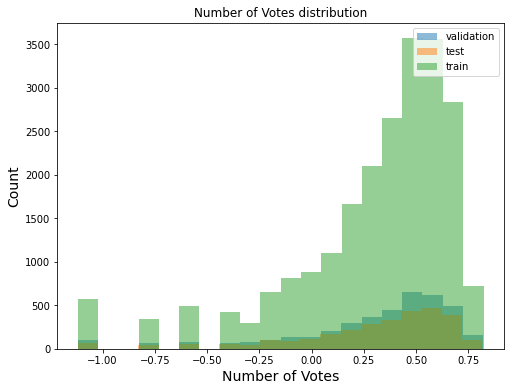

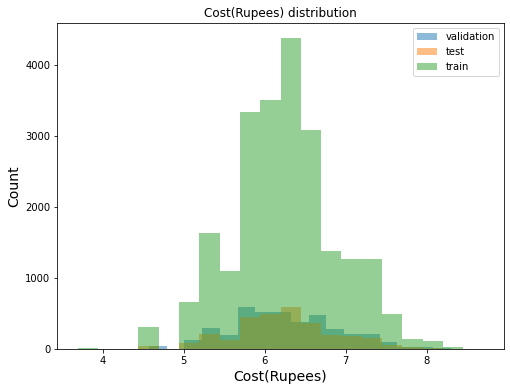

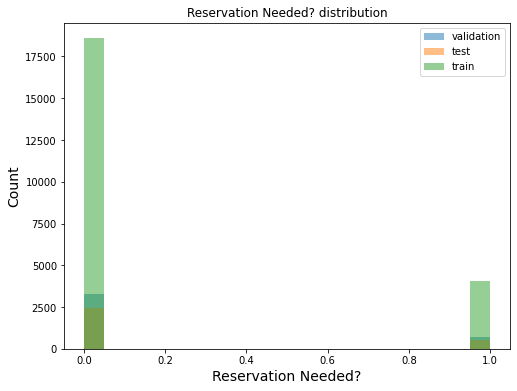

In [ ]:
X_test_plot = X_test[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']]

X_val_plot = X_val[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']]

X_train_plot = X_train[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

## Making predictions

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)


Mean squared error: 0.12
Coefficient of determination: 0.38
R^2 score on training set = 0.3827519856543501


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.13
Coefficient of determination: 0.38
R^2 score on validation set = 0.3786037462621984


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.13
Coefficient of determination: 0.38
R^2 score on test set = 0.3814759659496775


###Outliers

Now, we can standardize our dependent variable to 

In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler
rating_scaled = StandardScaler().fit_transform(data_norm['Rating'][:,np.newaxis]);
low_range = rating_scaled[rating_scaled[:,0].argsort()][:10]
high_range= rating_scaled[rating_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.27401007]
 [-4.27401007]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]
 [-3.83179205]]

outer range (high) of the distribution:
[[2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]
 [2.58036926]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


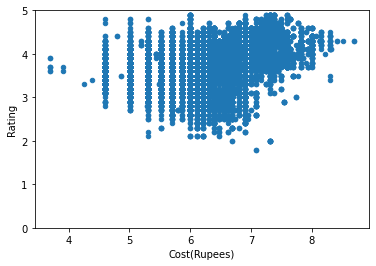

In [ ]:
#bivariate analysis Rating/Cost
var = 'Cost(Rupees)'
data = pd.concat([data_norm['Rating'], data_norm[var]], axis=1)
data.plot.scatter(x=var, y='Rating', ylim=(0,5));

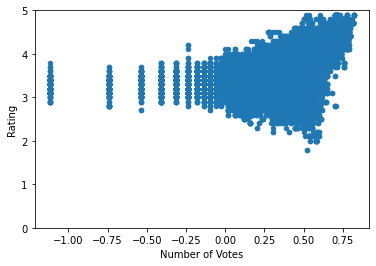

In [ ]:
#bivariate analysis Rating/Cost
var = 'Number of Votes'
data = pd.concat([data_norm['Rating'], data_norm[var]], axis=1)
data.plot.scatter(x=var, y='Rating', ylim=(0,5));

Plotting the two numerical variables against the standardized Rating, we do not see any outliers.

## Understanding the important features

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

**1. What are the data types? (Only numeric and categorical)**

  Meal Type: categorical
  Rating - numeric (The dependent variable)
  Number of Votes - numeric
  Online Ordering? - categorical
  Reservation Needed? - categorical
  City - categorical
  Restaurant Type -categorical
  Cuisines - categorical
  Cost - numeric

**2. Are there missing values?**
  Yes there are missing values mostly with ratings. It is possible this is the case if the restaurant is new. We also saw missing values for City, Restaurant Type, Cuisine, and Cost(Rupees). 


**3. What are the likely distributions of the numeric variables?**

  Both Cost(Rupees) and Votes are skewed right. The rating has a normal distribution. 

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

  Using pairplots, heatmap, and box plots, it was found that Cost, Votes, and Reservation (whether a reservation is required) has a correlation with our dependent variable rating and therefore is the most useful at predicting a target. 

5. Which independent variables have missing data? How much?

  	City	has 0.04% missing data
    
    Restaurant Type	has	0.44% missing data

    Cuisines has	0.09% missing data

    Cost(Rupees)	has	0.67% missing data


6. Do the training and test sets have the same data?

  Yes, the training and test data sets have overlapping data points. However, we split the data to have more values in the training set over the test set.

7. In the predictor variables independent of all the other predictor variables?

  Yes, by checking the VIF value for values over 10 and analzying the pairplots, heatmaps, and boxplots we can see that our data set does not have multicollinearity. 

8. Which predictor variables are the most important?

  The most important variables for our model are the Cost(Rupees), Number of Votes, and Reservation. 

9. Do the ranges of the predictor variables make sense?

In [ ]:
data.describe()

Rating         Votes  Cost(Rupees)
count  29638.000000  29611.000000  29638.000000
mean       3.732850      0.294617      6.225242
std        0.452188      0.398584      0.664829
min        1.800000     -1.118914      3.688879
25%        3.400000      0.145198      5.703782
50%        3.800000      0.412967      6.214608
75%        4.100000      0.571372      6.684612
max        4.900000      0.822121      8.699515

# Conclusion

From the analysis done above on the data set, it is clear that there is multicolinearity and ecxpet length all other dependent variables are significant.



# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
5. https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
6. https://www.kaggle.com/code/sanskrutikunjir/eda-notebook-sanskruti-kunjir

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documnetation** 







